In [ ]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from scipy.stats import norm

"""
Problem 3
"""






/Users/jakegonzales/Documents/Amazon/code/venv/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


Worst-case probability of loss:  0.19203644950901483
[[1.82483190e-14 1.85911393e-14 1.89484389e-14 ... 1.89344717e-14
  1.85771471e-14 1.82342987e-14]
 [4.55661709e-13 4.65022797e-13 4.74778082e-13 ... 4.74764083e-13
  4.65008772e-13 4.55647656e-13]
 [1.66723372e-12 1.70157464e-12 1.73736154e-12 ... 1.73734751e-12
  1.70156058e-12 1.66721963e-12]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.44981470e-14
  3.38560033e-14 3.32398294e-14]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.39552252e-14
  3.33236631e-14 3.27176430e-14]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.34296803e-14
  3.28083558e-14 3.22121591e-14]]


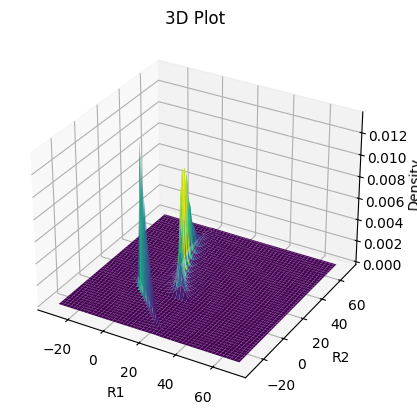

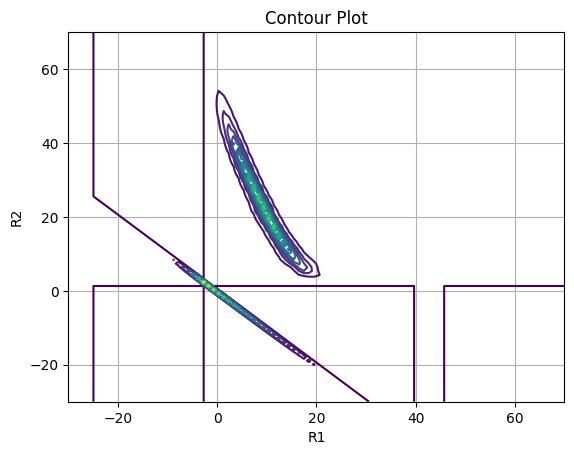

In [49]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from scipy.stats import norm

"""
Problem 5
"""

mu1 = 8
mu2 = 20
sigma1 = 6
sigma2 = 17.5
rho = -0.25

n = 100
r_1, r_n = -30, 70

# discretize R1 and R2 by n in [-30, 70]
r = np.linspace(r_1, r_n, n)

# marginal distributions
p1 = np.exp(-(r - mu1)**2 / (2 * sigma1**2))
p1 /= np.sum(p1)

p2 = np.exp(-(r - mu2)**2 / (2 * sigma2**2))
p2 /= np.sum(p2)

# region where R1 + R2 <= 0
r1p, r2p = np.meshgrid(r, r)
loss_region = (r1p + r2p <= 0)

"""
Define optimization problem
"""
P = cp.Variable((n, n), nonneg=True)

# Maximize: 
objective = cp.Maximize(cp.sum(cp.multiply(P, loss_region)))

#Subject to 
constraint1 = cp.sum(P, axis=1) == p1
constraint2 = cp.sum(P, axis=0) == p2
constraint3 = (r - mu1) @ P @ (r - mu2) == rho * sigma1 * sigma2
constraints = [constraint1, constraint2, constraint3]

# solve problem
problem = cp.Problem(objective, constraints)
problem.solve()

p_max = problem.value  # worst case probability of loss
print("Worst-case probability of loss: ", p_max)

# joint probability matrix
P = P.value
print(P)

# Plotting the first figure
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot_surface(r1p, r2p, P.T, cmap='viridis')
ax1.set_xlabel('R1')
ax1.set_ylabel('R2')
ax1.set_zlabel('Density')
ax1.set_title('3D Plot')

# Plotting the second figure
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
contour = ax2.contour(r1p, r2p, P.T, levels=20, cmap='viridis')
ax2.set_xlabel('R1')
ax2.set_ylabel('R2')
ax2.set_title('Contour Plot')
ax2.grid(True)

plt.show()


reshape(Sum(var73337, 1, False), (16, 1), F)
The optimal Energy value is:  162.1244355805247

 The speeds that achive this are: 
 [0.99992815 1.00020736 2.00028499 2.62493191 2.62494799 2.62494758
 2.62494704 2.62494537 3.000019   2.6249454  2.62494677 2.62494548
 3.00000926 3.00000813 3.00000816 3.0000082 ]


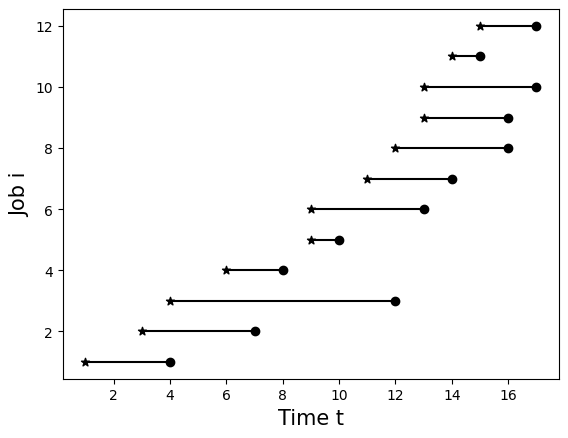

In [52]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from scipy.stats import norm

"""
Problem 6

"""

def plot_job_availability(A, D, n): 
    ax = plt.figure()
    plt.scatter(A, np.linspace(1,n,num=n), color='k', marker='*')
    plt.scatter(D+1, np.linspace(1,n,num=n), color='k', marker='o')
    for i in range(n):
        plt.plot(np.append(A[i],D[i]+1),np.append(i+1,i+1), 'k-')
    
    plt.xlabel('Time t', fontsize=font_size)
    plt.ylabel('Job i', fontsize=font_size)

def plot_speed(s): 
    pass 

# Given parameters
n = 12   # number of jobs.
T = 16   # number of time periods.
Smin = 1 # min processor speed.
Smax = 4 # max processor speed.
R = 1    # max slew rate.


alpha = 1
beta = 1
gamma = 1

# Job arrival times and deadlines.
A = np.array([1, 3, 4, 6, 9, 9, 11, 12, 13, 13, 14, 15])
D = np.array([3, 6, 11, 7, 9, 12, 13, 15, 15, 16, 14, 16])
# Total work for each job.
W = np.array([2, 4, 10, 2, 3, 2, 3, 2, 3, 4, 1, 4])

# define problem variables
P = cp.Variable((T, n))
s = cp.sum(P, axis=1)
theta = P / cp.reshape(s, (T, 1))

# define constraints
constraints = [
    P >= 0,
    s >= Smin,
    s <= Smax,
    cp.abs(s[1:] - s[:-1]) <= R, # slew-rate constraint
    cp.sum(P, axis=0) >= W
]

# job availability constraints 
for i in range(n):
    for t in range(A[i] - 1): # A[i] indexed at 1
        constraints.append(P[t, i] == 0)
    for t in range(D[i], T):
        constraints.append(P[t, i] == 0)

# define objective function
objective = cp.Minimize(cp.sum(alpha + beta * s + gamma * s**2))

problem = cp.Problem(objective, constraints)
problem.solve()

# optimal Energy
E = problem.value
print("The optimal Energy value is: ", E)

speed = s.value
print("\n The speeds that achive this are: \n", speed)

allocation = theta.value.T
#print("\n allocation: \n ", allocation)


plot_job_availability(A,D,n)
